# 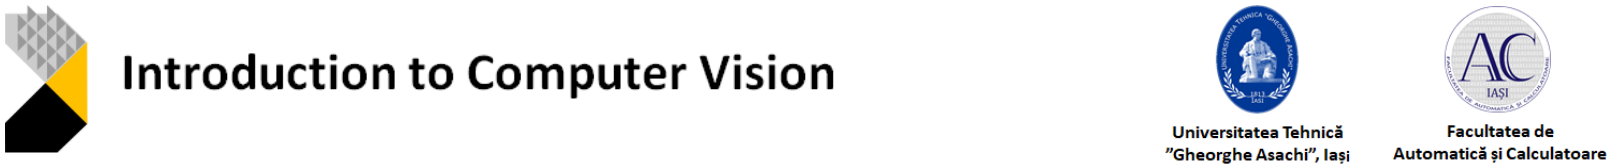

  The Intro to Computer Vision labs will be run in Google Colaboratory, a Jupyter notebook environment that runs entirely in the cloud, you don't need to download anything. To run these labs, you must have a Google account.

Step 1: click on the assignment invite link -> **Accept this assignment**. Refresh page -> individual repo for the specific assignment is created automatically

Step 2: Navigate to http://colab.research.google.com/github -> Click the **Include Private Repos** checkbox -> **select the correct repo** (SistemeDeVedereArtificiala/assignment_name-student_name) -> Click on the jupyter notebook of the current assignment

Step 3: [GitHub sign-in window] In the popup window, sign-in to your Github account and authorize Colab to read the private files.

Step 4: [in colab] **File** -> **Save a copy to GitHub**. Select the correct repository for the SPECIFIC assignment -> Click the **Include Colab Link** -> Click **OK**

Step 5: [in colab] Navigate to the **Runtime** tab --> **Change runtime type**, under **Hardware accelerator** select **GPU/TPU** (tensor processing unit) according to your needs. 
  
  <font color='red'>Read the suggestions and accomplish all tasks marked with **#TODO**.

!!! At the end of each laboratory **REPEAT step 4 in order to SAVE** the answers to your private repository (individual for each assignment)</font>

# Project 1: Lane Detection

In the field of Computer Vision, extraction of geometric features from images is a common problem. Different approaches have been proven to be efficient in extracting particular features as part of the solution. Some solutions involve global examination of the input image, while others involve local examination at pixel level. A basic feature of any self-driving system is Lane Detection.




## Week 2: fitting lines using Hough Transform

Q: Wait, why aren’t we done just by running Canny edge detection?

A: Because we only have edges, for the desired result we need to define the function which turns these edges into lines.

###Questions when fitting lines:
1. Given points that belong to a line, what is the line?
2. How many lines are there?
3. Which points belong to which lines?

Hough Transform is a voting technique that can be used to answer all of these.

###From Image space to Hough Space:
1. A line in the image corresponds to a point in Hough space.
2. To go from image space to Hough space:
> Given a set of points (x,y), find all (m,b) such that y = m*x + b
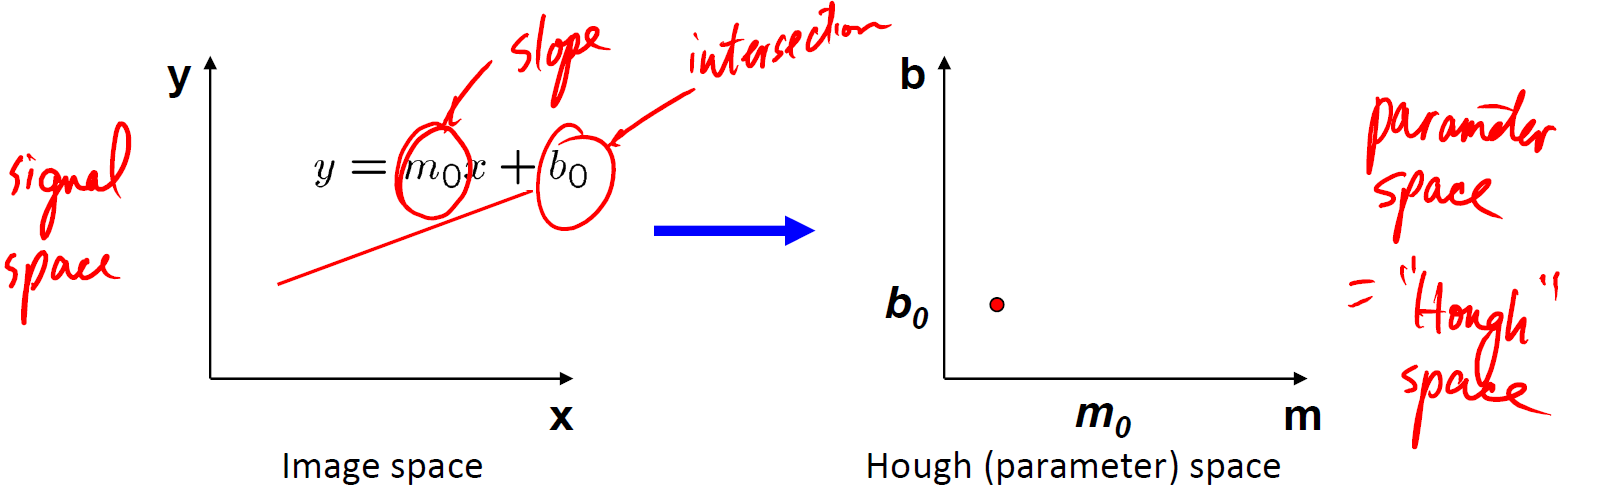
3. Q: What does a point (x0, y0) in the image space map to?
> A: the solutions of b = -x0m + y0. This is **a line in Hough space**.
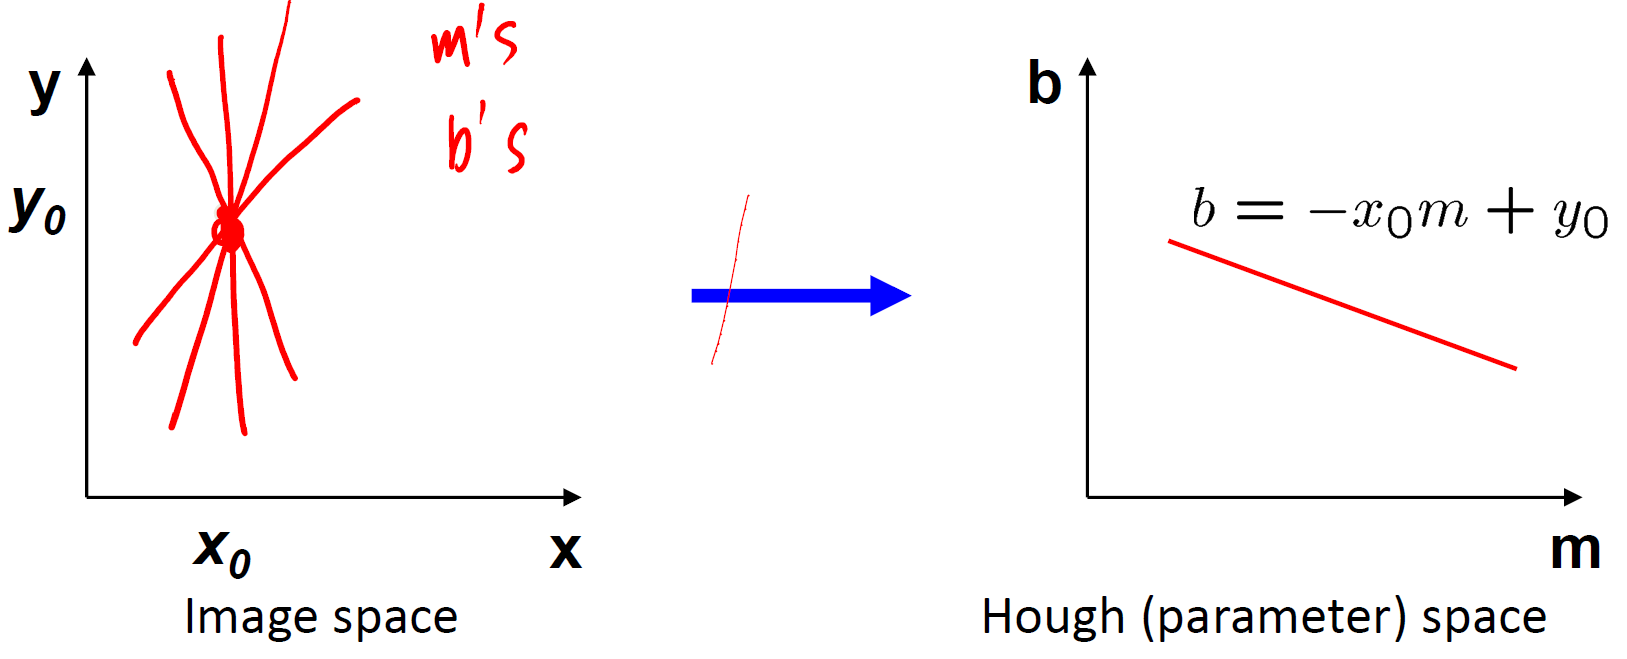
4. Q: What are the line parameters for the line that contains both (x0, y0) and (x1, y1)?
> A: It is the intersection of the lines b = –x0m + y0 and b = –x1m + y1
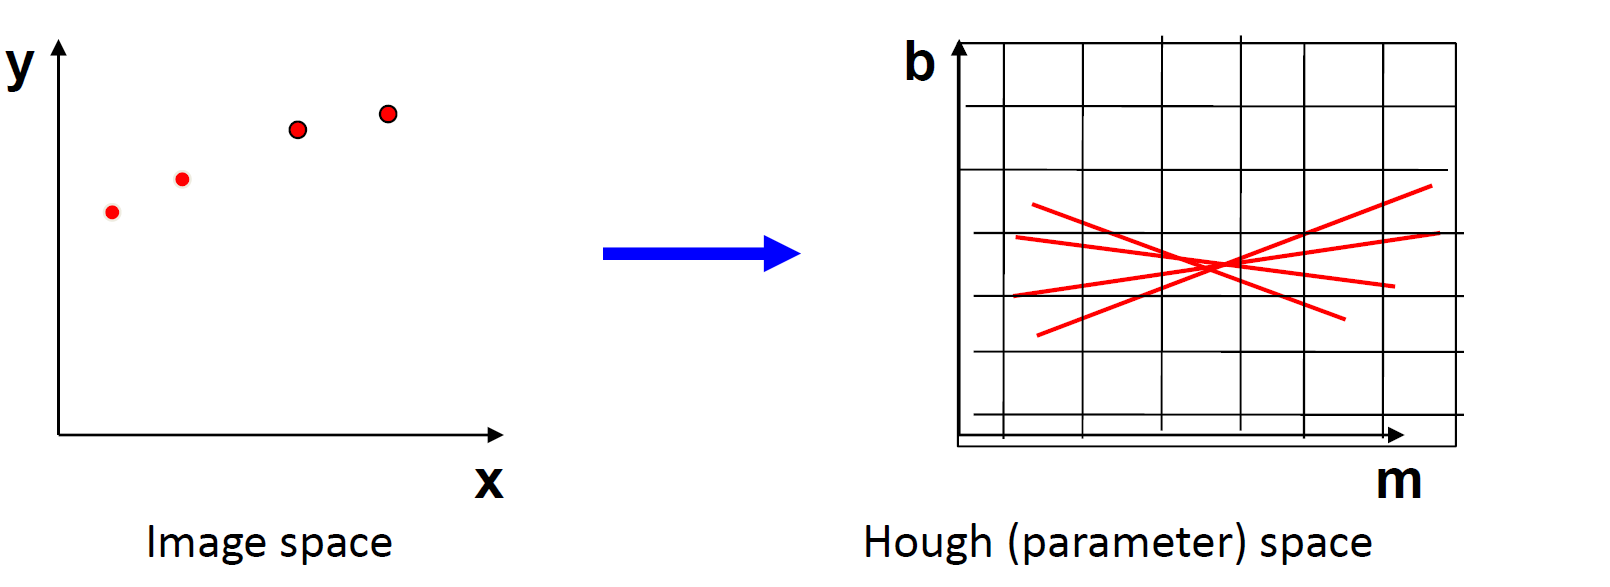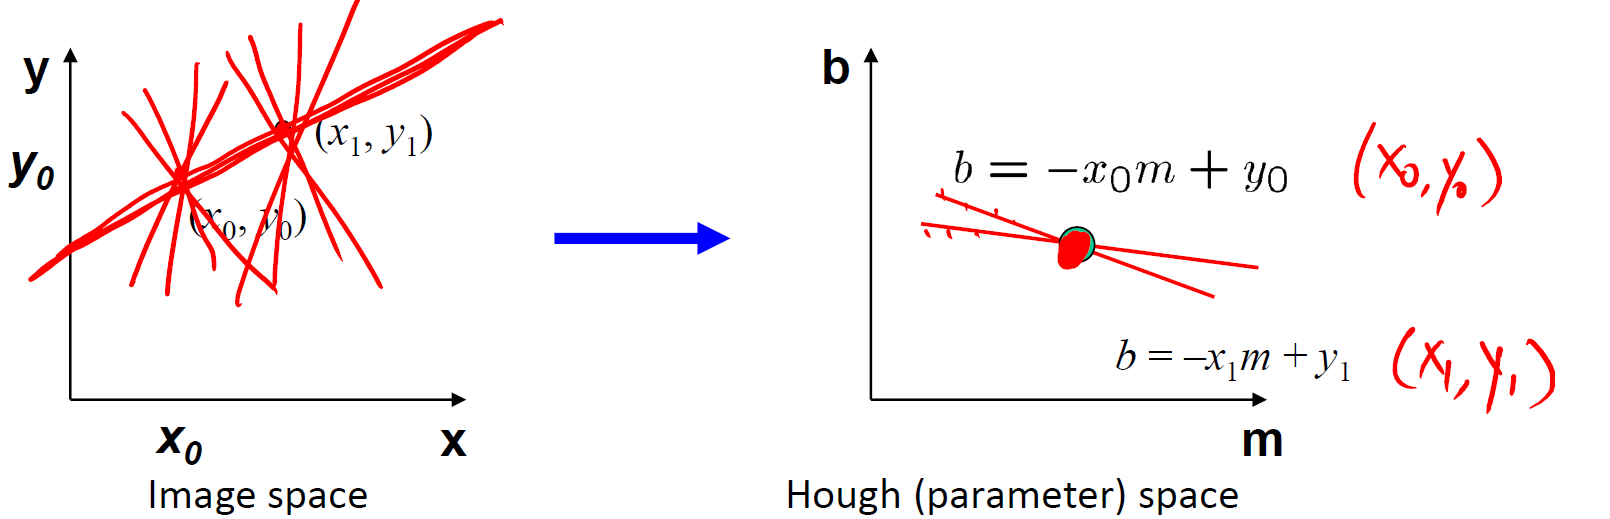

###Hough Transform a voting technique:
1. Record all possible lines on which each edge point lies.
2. Look for lines that get many votes.
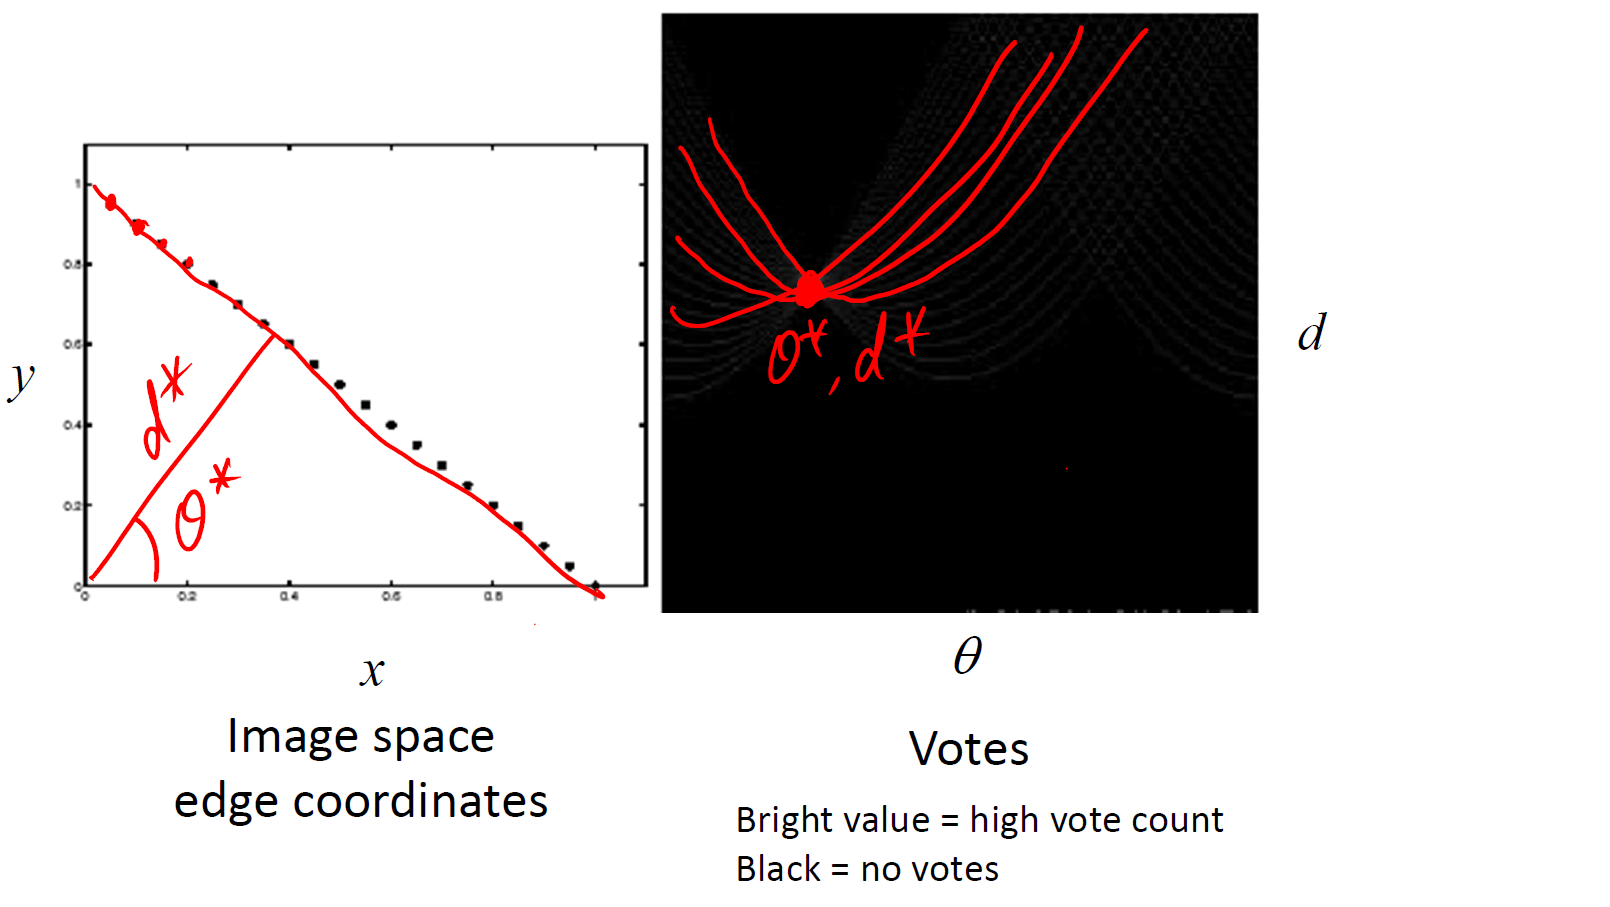

In [ ]:
#TODO: go to 1st demo at https://www.aber.ac.uk/~dcswww/Dept/Teaching/CourseNotes/current/CS34110/hough.html and draw parallel lines and inspect detected lines and Hough Transform
#TODO: go to 2nd demo at http://dersmon.github.io/HoughTransformationDemo/ and test rectangle & circle images with different thresholds

TODO: insert here the results from demo 1 & demo 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
#TODO: add last week's functions (grayscale, gaussian_smoothing, canny_detector, region_of_interest, overlap, our_pipeline)

def grayscale(img):
  #code here
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  return gray

# 2. gaussian smoothing
def gaussian_smoothing(img, kernel_size):
  #code here
  smoothed_img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
  return smoothed_img

# 3. Canny edge detection
def canny_detector(img, low_threshold, high_threshold):
  #code here
  canny_edges = cv2.Canny(img, low_threshold, high_threshold)
  return canny_edges

# 4. Region of Interest: define vertices, create the mask (trapeze), apply the mask to Canny edges
def region_of_interest(img):
  #code here
  rows, cols = img.shape[:2]
  A = [0.3*cols, rows]#[0, rows*0.95]
  B = [cols*0.5, rows*0.3]
  C = [0.7*cols, rows]
  vertices = np.array([[A, B, C]], dtype=np.int32)

  # defining a blank mask to start with
  mask = np.zeros_like(img)
  ignore_mask_color = 255  # filling pixels inside the polygon defined by "vertices" with the fill color    
  
  cv2.fillPoly(mask, vertices, ignore_mask_color)
  
  masked_edges = cv2.bitwise_and(img, mask)
  return masked_edges

# 5. Overlap two images
def overlap(img, a, initial_img, b, c):
  #code here
  edges_over_gray = cv2.addWeighted(img, a, initial_img, b, c)
  return edges_over_gray

# 6. our pipeline as a function
def our_pipeline(image):
    #Grayscale
    #code here
    gray_img = grayscale(image)

    #Gaussian Smoothing
    #code here
    kernel_size = 5 # Must be an odd number (3, 5, 7...)
    smoothed_img = gaussian_smoothing(gray_img, kernel_size)

    #Canny Edge Detection
    #code here
    #parameters
    low_threshold = 180
    high_threshold = 240
    canny_img = canny_detector(smoothed_img, low_threshold, high_threshold)

    #Masked Image Within a Polygon
    masked_edges = region_of_interest(canny_img)

    #Hough Transform Lines
    # rho = 1               # distance resolution in pixels of the Hough grid
    # theta = np.pi/180     # angular resolution in radians of the Hough grid
    # threshold = 20        # minimum number of votes (intersections in Hough grid cell)
    # min_line_length = 20  # minimum number of pixels making up a line
    # max_line_gap = 100    # maximum gap in pixels between connectable line segments
    # 
    # lines = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)
    # 
    a = 0.7
    b = 0.3
    c = 0
    # output = overlap(lines, a, image, b, c)

    #Draw lines on input image
    #code here
    edges = cv2.bitwise_not(masked_edges)
    output = overlap(edges, a, gray_img, b, c)

    return output

In [ ]:
#TODO: read image
#TODO: read test image - see cv2.imread
image = cv2.imread('um_000093.png')

#TODO: BGR to RGB - see cv2.cvtColor
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#TODO: print out input image - see plt.imshow from matplotlib.pyplot: 
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

#TODO: apply last week's pipeline on test image
# Apply pipeline on test image
result = our_pipeline(image)

#TODO: print result 
plt.imshow(result, cmap='gray')  # Assuming the result is grayscale
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
#TODO: Function to draw lines on image
# each line is described by a pair of 2 points 
# parameter lines is a list of (x1, y1, x2, y2)

def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    """
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            #TODO: draw a line on the image - see cv2.line
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

In [ ]:
#TODO: Function to extract hough lines and draw them on a blank (white) image

# Hough transform parameters 
# rho                  - distance resolution in pixels of the Hough grid
# theta                - angular resolution in radians of the Hough grid
# threshold            - minimum number of votes (intersections in Hough grid cell)
# min_line_length      - minimum number of pixels making up a line
# max_line_gap = 180   - maximum gap in pixels between connectable line segments

def hough_lines(img, rho, theta, threshold, min_line_length, max_line_gap):
    """
    `img` should be the output of a Canny transform.
    Returns an image with hough lines drawn.
    """
    # Create a blank image to draw lines on
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    # Extract Hough lines using cv2.HoughLinesP
    lines = cv2.HoughLinesP(line_img, rho, theta, threshold, np.array([]), minLineLength=min_line_length, maxLineGap=max_line_gap)

    # Draw lines on the blank image
    draw_lines(line_img, lines)

    return line_img

In [ ]:
#last week's code until masked Canny edges
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

kernel_size = 5 # Must be an odd number (3, 5, 7...)
smoothed_img = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

low_threshold = 160
high_threshold = 260
canny_edges = cv2.Canny(smoothed_img, low_threshold, high_threshold)

rows, cols = image.shape[:2]
A = [0, rows*0.95]
B = [0.5*cols, rows*0.3]
C = [0.7*cols, rows]
vertices = np.array([[A, B, C]], dtype=np.int32)
mask = np.zeros_like(gray)
ignore_mask_color = 255
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(canny_edges, mask)

plt.imshow(masked_edges, cmap='gray')


In [ ]:
#TODO: Apply hough_lines on last week's masked Canny edges

# recommended Hough transform parameters
rho = 1               # distance resolution in pixels of the Hough grid
theta = np.pi/180     # angular resolution in radians of the Hough grid
threshold = 20        # minimum number of votes (intersections in Hough grid cell)
min_line_length = 20  #minimum number of pixels making up a line
max_line_gap = 180    # maximum gap in pixels between connectable line segments

hough_image = hough_lines(masked_edges, rho, theta, threshold, min_line_length=min_line_length, max_line_gap=max_line_gap)

#TODO: print Hough lines - see plt.imshow
# Display the detected Hough lines
plt.imshow(hough_image)
plt.axis('off')
plt.show()


In [ ]:
#TODO: overlap Hough lines on RGB input image - see overlap function defined last week
# Set transparency parameters for overlap
a = 0.8
b = 1
c = 0

# Overlay Hough lines on the RGB input image
output = overlap(hough_image, a, image_rgb, b, c)

# Print the result
plt.imshow(output)
plt.axis('off')
plt.show()


In [ ]:
#TODO: add Hough lines to our_pipeline function defined last week
# 6. our pipeline as a function
def our_pipeline(image):
    #Grayscale
    #code here
    gray_img = grayscale(image)

    #Gaussian Smoothing
    #code here
    kernel_size = 5 # Must be an odd number (3, 5, 7...)
    smoothed_img = gaussian_smoothing(gray_img, kernel_size)

    #Canny Edge Detection
    #code here
    #parameters
    low_threshold = 180
    high_threshold = 240
    canny_img = canny_detector(smoothed_img, low_threshold, high_threshold)

    #Masked Image Within a Polygon
    masked_edges = region_of_interest(canny_img)

    #Hough Transform Lines
    rho = 1               # distance resolution in pixels of the Hough grid
    theta = np.pi/180     # angular resolution in radians of the Hough grid
    threshold = 20        # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 20  # minimum number of pixels making up a line
    max_line_gap = 100    # maximum gap in pixels between connectable line segments

    lines = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)
    # 
    a = 0.7
    b = 0.3
    c = 0
    output = overlap(lines, a, image, b, c)

    #Draw lines on input image
    #code here
    # edges = cv2.bitwise_not(masked_edges)
    # output = overlap(edges, a, gray_img, b, c)

    return output

In [ ]:
#TODO: apply updated pipeline - use our_pipeline
final_image = our_pipeline(output)

# Print the result
plt.imshow(final_image)
plt.axis('off')
plt.show()

Not finished yet! 

Multiple lines are confuzing.

In [ ]:
# this function calculates only one left line and one right line as a mean of the multiple left lines, respectively multiple right lines
# it uses the line equation with slope y = m*x + n to determine which are / and which \
# at the end the two lines are drawn on the input image

def slope_lines(image, lines):
    img = image.copy()
    poly_vertices = []
    order = [0, 1, 3, 2]

    left_lines = []  # Like /
    right_lines = []  # Like \
    for line in lines:
        for x1, y1, x2, y2 in line:
            if x1 == x2:
                pass  # Vertical Lines
            else:
                # Slope of a line crossing A(x1, y2), B(x2, y2)
                m = (y2 - y1) / (x2 - x1)
                # We know that equation of line is y = m*x + n so we can write n = y - m*x
                n = y1 - m * x1

                if m < 0:
                    left_lines.append((m, n))
                elif m >= 0:
                    right_lines.append((m, n))
                    
    print(left_lines)
    print(right_lines)

    # Arithmetic mean to get only one (m, n) coefficients for left '/' and right '\' lines
    _left_line = np.mean(left_lines, axis=0) if left_lines else None
    _right_line = np.mean(right_lines, axis=0) if right_lines else None
    
    print(_left_line)
    print(_right_line)

    # For both left & right lines compute the 2 points describing a line
    # The 2 segments are from the bottom to 60% of the height
    for slope, intercept in [_left_line, _right_line]:
        if slope is not None and intercept is not None:  # Check if slope and intercept are not None
            rows, cols = image.shape[:2]
            y1 = int(rows)
            y2 = int(rows * 0.6)
            x1 = int((y1 - intercept) / slope)
            x2 = int((y2 - intercept) / slope)
            poly_vertices.append((x1, y1))
            poly_vertices.append((x2, y2))
            draw_lines(img, np.array([[[x1, y1, x2, y2]]]))

    # Vertices of the two lines (looking like: / \ )
    poly_vertices = [poly_vertices[i] for i in order]

    # Fill with color between left and right line
    cv2.fillPoly(img, pts=np.array([poly_vertices], 'int32'), color=(0, 255, 0))

    # Overlap to original
    return overlap(image, 0.9, img, 0.4, 0.5)


In [ ]:
#TODO: in function hough_lines replace draw_lines(line_img, lines)
# with line_img = slope_lines(line_img, lines)
# and execute hough_lines block to use the updated function

# Hough transform parameters 
# rho                  - distance resolution in pixels of the Hough grid
# theta                - angular resolution in radians of the Hough grid
# threshold            - minimum number of votes (intersections in Hough grid cell)
# min_line_length      - minimum number of pixels making up a line
# max_line_gap = 180   - maximum gap in pixels between connectable line segments

def hough_lines(img, rho, theta, threshold, min_line_length, max_line_gap):
    """
    `img` should be the output of a Canny transform.
    Returns an image with hough lines drawn.
    """
    # Extract Hough lines using cv2.HoughLinesP
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_length, maxLineGap=max_line_gap)

    # Blank image (on 3 channels) the same size as the input image to draw the lines on
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    # Draw lines on the blank image
    # draw_lines(line_img, lines)
    line_img = slope_lines(line_img, lines)

    return line_img

In [ ]:
#TODO: apply updated pipeline and print result
#code here
# image = cv2.imread('/content/drive/My Drive/Facultate/SVA/Sisteme de Vedere Artificială - proiecte de laborator/P1/Datasets for Lane Detection/um_000093.png')
# image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# 
# output = our_pipeline(image)
# plt.imshow(output)


#TODO: read image
#TODO: read test image - see cv2.imread
image = cv2.imread('um_000093.png')

#TODO: BGR to RGB - see cv2.cvtColor
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#TODO: print out input image - see plt.imshow from matplotlib.pyplot: 
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

#TODO: apply last week's pipeline on test image
# Apply pipeline on test image
result = our_pipeline(image)

#TODO: print result 
plt.imshow(result, cmap='gray')  # Assuming the result is grayscale
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
# # Open the input video file
# cap = cv2.VideoCapture('in.mp4')
# 
# # Read and display each frame until the end of the video
# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break
# 
#     # Display the frame
#     cv2.imshow('Frame', frame)
# 
#     # Exit if 'q' is pressed
#     if cv2.waitKey(25) & 0xFF == ord('q'):
#         break
# 
# # Release the video capture object and close all OpenCV windows
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# from moviepy.editor import VideoFileClip
# # from shutil import copyfile
# # copyfile('in.mp4', 'out.mp4')
# 
# #TODO: adjust the Region of Interest (A, B, C) so that every frame has lines. If for a frame our_pipeline does not find lines you will get an error.
# white_output = "out.mp4"
# clip1 = VideoFileClip("in.mp4")
# white_clip = clip1.fl_image(our_pipeline) #NOTE: this function expects color images!!
# white_clip.write_videofile(white_output, audio=False)

In [ ]:
# # Open the output video file
# cap = cv2.VideoCapture('out.mp4')
# 
# # Read and display each frame until the end of the video
# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break
# 
#     # Display the frame
#     cv2.imshow('Frame', frame)
# 
#     # Exit if 'q' is pressed
#     if cv2.waitKey(25) & 0xFF == ord('q'):
#         break
# 
# # Release the video capture object and close all OpenCV windows
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# Open the input video file
cap = cv2.VideoCapture('in.mp4')

# Get the video's frame width and height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object for the output video
out = cv2.VideoWriter('out.mp4', cv2.VideoWriter_fourcc(*"mp4v"), 20.0, (frame_width, frame_height))

# Process each frame of the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply the our_pipeline function to the current frame
    processed_frame = our_pipeline(frame)  

    # Display the processed frame
    plt.imshow(cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Write the processed frame to the output video file
    out.write(processed_frame)

# Release input and output video files
cap.release()
out.release()